In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import matplotlib
import glob
import os
from matplotlib.lines import Line2D
fontsize = 12

## Lenti MPRA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
celltype = 'K562'
hepg2_df = pd.read_csv('../lentiMPRA/results/'+celltype+'_2B5_1000G_layersearch.csv')
linear_df = pd.read_csv('../lentiMPRA/results//LR_mpra_'+celltype+'_2B5_1000G.csv')
result_df = pd.merge(hepg2_df, linear_df, how='left', on='Layer')
for col in result_df.columns:
    if 'RR' in col:
        result_df.drop(col,axis=1,inplace=True)

performance = pd.melt(result_df,id_vars='Layer',var_name = 'Model',value_name='Pearson R' )



celltype = 'HepG2'
hepg2_df = pd.read_csv('../lentiMPRA/results/'+celltype+'_2B5_1000G_layersearch.csv')
linear_df = pd.read_csv('../lentiMPRA/results//LR_mpra_'+celltype+'_2B5_1000G.csv')
result_df = pd.merge(hepg2_df, linear_df, how='left', on='Layer')
for col in result_df.columns:
    if 'RR' in col:
        result_df.drop(col,axis=1,inplace=True)

performance2 = pd.melt(result_df,id_vars='Layer',var_name = 'Model',value_name='Pearson R' )

models = np.unique(performance.Model)

results = {}
for name in models:
    entry = performance[performance.Model == name]
    results[name] = np.array(entry['Pearson R'])
x = np.array(entry['Layer'])
results.keys()



results2 = {}
for name in models:
    entry = performance2[performance2.Model == name]
    results2[name] = np.array(entry['Pearson R'])
x = np.array(entry['Layer'])
results2.keys()

baseline_df = pd.read_csv('../lentiMPRA/results/LLM_baseline.csv')

## lolipop plot
df = pd.read_csv('../lentiMPRA/results/lenti.csv',index_col=None)
df = df.replace({'base_CNN_model': 'One-hot','sei': 'SEI','dnabert2': 'DNABERT2','gpn': 'GPN','hyena': 'Hyena'})

In [3]:
temp_df = df[df['Model'].isin(['NT','GPN','Hyena','DNABERT2'])]
temp_df = temp_df.rename(columns={"Model": "LLM","Pearson's R":'Performance'})
temp_df['Model'] = 'Full-embed-CNN'

In [4]:
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['CLS-Ridge'],
                'Performance':results['CLS Ridge Regression'][-1],'Cell Type':['K562']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['CLS-MLP'],
                'Performance':results['MLP with CLS'][-1],'Cell Type':['K562']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['Mean-embed-Ridge'],
                'Performance':results['Mean Embedding Ridge Regression'][-1],'Cell Type':['K562']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['Mean-embed-MLP'],
                'Performance':results['MLP with mean embed'][-1],'Cell Type':['K562']})], ignore_index=True)

baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['CLS-Ridge'],
                'Performance':results2['CLS Ridge Regression'][-1],'Cell Type':['HepG2']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['CLS-MLP'],
                'Performance':results2['MLP with CLS'][-1],'Cell Type':['HepG2']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['Mean-embed-Ridge'],
                'Performance':results2['Mean Embedding Ridge Regression'][-1],'Cell Type':['HepG2']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,pd.DataFrame({'LLM':['NT'],'Model':['Mean-embed-MLP'],
                'Performance':results2['MLP with mean embed'][-1],'Cell Type':['HepG2']})], ignore_index=True)
baseline_df = pd.concat([baseline_df,temp_df])
baseline_df['Model'] = pd.Categorical(baseline_df['Model'], ["CLS-Ridge",'Mean-embed-Ridge','CLS-MLP','Mean-embed-MLP','Full-embed-CNN'])

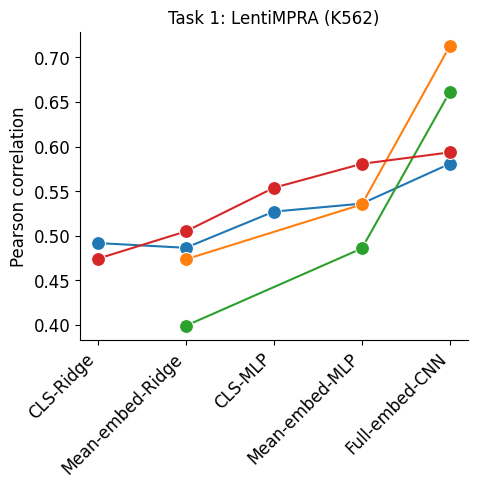

In [5]:
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 10   

sub_df = baseline_df[baseline_df['Cell Type'] == 'K562']
fig,ax = plt.subplots(1,1,figsize=(5,4))
hue_order = ['NT','GPN','Hyena','DNABERT2']
fig = sns.lineplot(sub_df,x='Model',y='Performance',hue='LLM',marker='o',hue_order = hue_order)
plt.yticks(fontsize=fontsize);
plt.xticks(fontsize=fontsize,rotation=45,ha='right');
plt.ylabel("Pearson correlation",fontsize=fontsize);
plt.xlabel("",fontsize=fontsize);
plt.title('Task 1: LentiMPRA (K562)',fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_legend().remove()
plt.savefig('./embed_k562.svg',bbox_inches='tight')

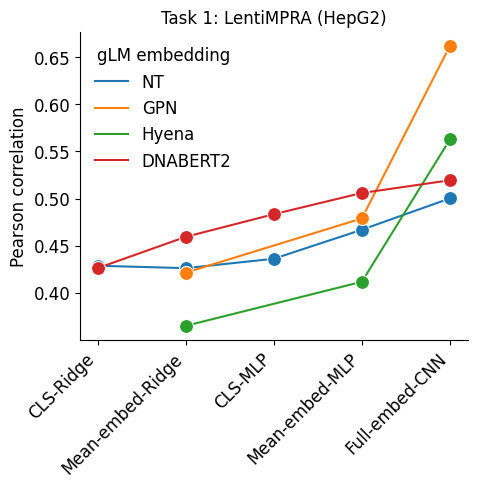

In [6]:
mpl.rcParams['lines.markersize'] = 10   
sub_df = baseline_df[baseline_df['Cell Type'] == 'HepG2']
fig,ax = plt.subplots(1,1,figsize=(5,4))
hue_order = ['NT','GPN','Hyena','DNABERT2']
fig = sns.lineplot(sub_df,x='Model',y='Performance',hue='LLM',marker='o',hue_order=hue_order)
plt.yticks(fontsize=fontsize);
plt.xticks(fontsize=fontsize,rotation=45,ha = 'right');
plt.ylabel("Pearson correlation",fontsize=fontsize);
plt.xlabel("",fontsize=fontsize);
plt.title('Task 1: LentiMPRA (HepG2)',fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
legend = plt.legend(title='gLM embedding', loc='upper left',frameon=False,fontsize = fontsize)
legend.get_title().set_fontsize(fontsize)
plt.savefig('./embed_hepg2.svg',bbox_inches='tight')

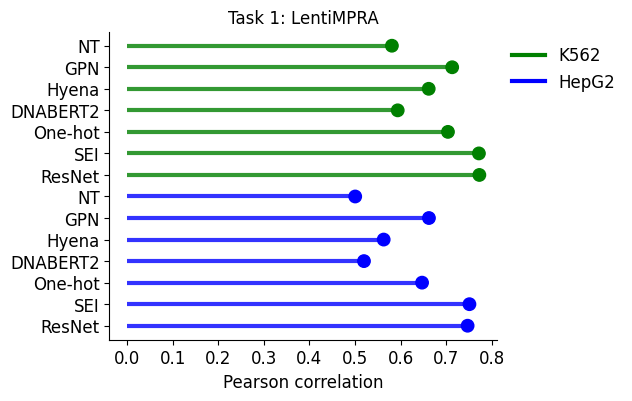

In [7]:
model_ordering = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','ResNet']
model_ordering = model_ordering[::-1]
df.Model = df.Model.astype("category")
df.Model = df.Model.cat.set_categories(model_ordering)
df = df.sort_values(['Cell Type','Model'])
my_range=range(0,len(df))
my_color=np.where(df['Cell Type']=='HepG2','b','g')
fig,ax = plt.subplots(1,1,figsize=(5,4))
plt.hlines(y=range(len(df)), xmin=0, xmax=df["Pearson's R"], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(df["Pearson's R"], range(len(df)), color=my_color, s=80, alpha=1)
plt.title("Task 1: LentiMPRA",fontsize=fontsize)
plt.xlabel("Pearson correlation", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(range(len(df)),df['Model'].to_list());
# plt.grid()
custom_lines = [matplotlib.lines.Line2D([0], [0], color="g", lw=3),
                matplotlib.lines.Line2D([0], [0], color="b", lw=3)]
plt.legend(custom_lines, ['K562', 'HepG2'],  bbox_to_anchor=(1,1),frameon=False,fontsize = fontsize);
plt.savefig('./lenti.svg',bbox_inches='tight')

In [8]:
df_sub = df[df['Cell Type']=='HepG2']

In [9]:
model_ordering = ['NT','GPN','Hyena','DNABERT2','SEI','One-hot','ResNet']
model_ordering = model_ordering[::-1]
df_sub.Model = df_sub.Model.astype("category")
df_sub.Model = df_sub.Model.cat.set_categories(model_ordering)
df_sub = df_sub.sort_values(['Cell Type','Model'])
my_color=['orange','orange','g','b','b','b','b']

/tmp/ipykernel_4644/1009020241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.Model = df_sub.Model.astype("category")
/tmp/ipykernel_4644/1009020241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.Model = df_sub.Model.cat.set_categories(model_ordering)


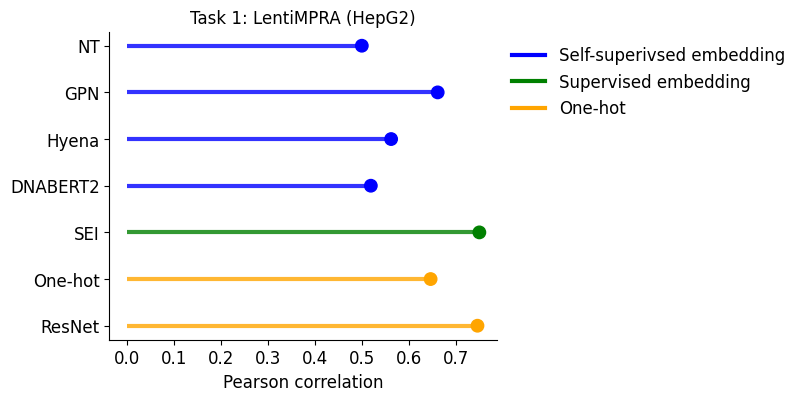

In [10]:
my_range=range(0,len(df_sub))
fig,ax = plt.subplots(1,1,figsize=(5,4))
plt.hlines(y=range(len(df_sub)), xmin=0, xmax=df_sub["Pearson's R"], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(df_sub["Pearson's R"], range(len(df_sub)), color=my_color, s=80, alpha=1)
plt.title("Task 1: LentiMPRA (HepG2)",fontsize=fontsize)
plt.xlabel("Pearson correlation", fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.yticks(range(len(df_sub)),df_sub['Model'].to_list());

custom_lines = [matplotlib.lines.Line2D([0], [0], color="b", lw=3),
                matplotlib.lines.Line2D([0], [0], color="g", lw=3),
                matplotlib.lines.Line2D([0], [0], color="orange", lw=3)]
plt.legend(custom_lines, ['Self-superivsed embedding', 'Supervised embedding','One-hot'],  bbox_to_anchor=(1,1),frameon=False,fontsize = fontsize);
plt.savefig('./temp.svg',bbox_inches='tight')
# plt.grid()

## Chip performance

In [2]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/chip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 32 CNN': 'NT'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

group_df = total_df.groupby(['Model','TF'])
mean_df = group_df.mean()
std_df = group_df.std()
plot_df = mean_df.merge(std_df,on=['Model','TF'])
plot_df = plot_df[['AUROC_x','AUROC_y']]
plot_df = plot_df.reset_index(level=1)
plot_df['AUROC_y'] = plot_df['AUROC_y'].fillna(0)
pal = sns.color_palette()
pal = pal.as_hex()
exp = total_df['TF'].unique()
pal_dic = {exp[i]:pal[i]for i in range(len(exp))}

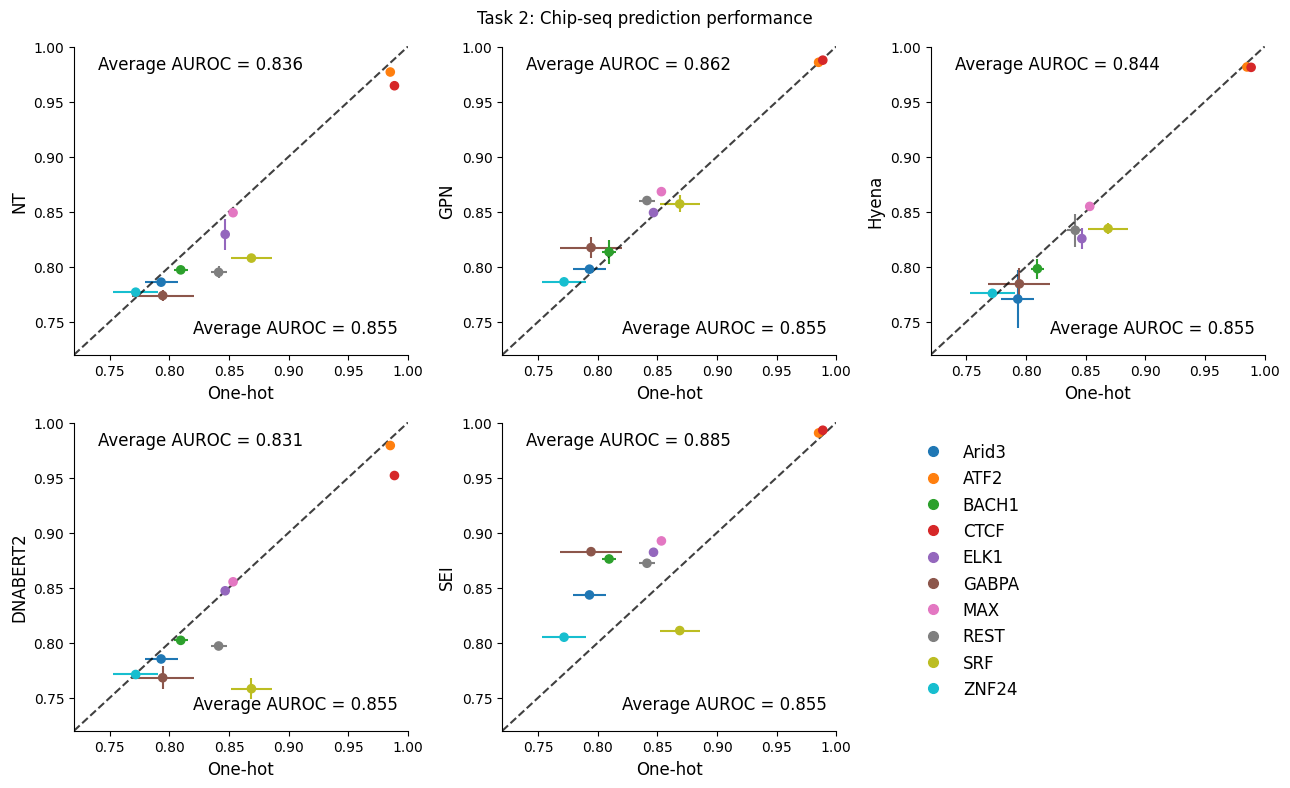

In [3]:
fig,axs = plt.subplots(2,3,figsize = (13,8),sharex=False,sharey=False)
plt.setp(axs, xlim=(0.72,1), ylim=(0.72,1))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
fig.delaxes(axs[-1,-1])
i = 0
for m in ['NT','GPN','Hyena','DNABERT2','SEI']:
    ax = axs[i//3,i%3]
    ax.errorbar(x=plot_df.loc['One-hot']['AUROC_x'],
                y=plot_df.loc[m]['AUROC_x'],
                xerr=plot_df.loc['One-hot']['AUROC_y'],
                yerr=plot_df.loc[m]['AUROC_y'],
                marker = '', ls = '',
                zorder =0, ecolor = plot_df.loc[m]['TF'].map(pal_dic))
    ax.scatter(x=plot_df.loc['One-hot']['AUROC_x'],y=plot_df.loc[m]['AUROC_x'],c=plot_df.loc[m]['TF'].map(pal_dic),s=35)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    average = plot_df.loc[m]['AUROC_x'].mean()
    base_average = plot_df.loc['One-hot']['AUROC_x'].mean()
    ax.text(lims[0]+0.02,lims[1]-0.02,"Average AUROC = %.3f" % (average),fontsize=fontsize)
    ax.text(lims[0]+0.1,lims[0]+0.02,"Average AUROC = %.3f" % (base_average),fontsize=fontsize)
    # ax.text(lims[1]-0.5,lims[0],"Average Pearson's r = 0.247" )
    ax.set_ylabel(m,fontsize = fontsize)
    ax.set_xlabel('One-hot',fontsize = fontsize)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i +=1 
## Shared legend
legend_elements =[Line2D([0],[0],linestyle='', marker='o', 
                        label=exp[i],
                        markerfacecolor=pal[i],
                        markeredgecolor = pal[i], 
                        markersize=7) for i in  range(len(exp))]
plt.suptitle('Task 2: Chip-seq prediction performance',fontsize=fontsize)
fig.legend(handles = legend_elements, fontsize=fontsize, frameon=False, loc='lower right',bbox_to_anchor=(0.8,0.1))
plt.tight_layout()
plt.savefig('./chip.svg')

## CLIP

In [4]:
total_df = pd.DataFrame()
for file in glob.glob('../chip-clip-seq/result/eclip_result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    total_df = pd.concat((total_df,df),ignore_index=True)
total_df = total_df.replace({'NT 32 CNN': 'NT'})
total_df = total_df.replace({'sei': 'SEI'})
total_df = total_df.replace({'CNN': 'One-hot'})

group_df = total_df.groupby(['Model','TF'])
mean_df = group_df.mean()
std_df = group_df.std()
plot_df = mean_df.merge(std_df,on=['Model','TF'])
plot_df = plot_df[['AUROC_x','AUROC_y']]
plot_df = plot_df.reset_index(level=1)
plot_df['AUROC_y'] = plot_df['AUROC_y'].fillna(0)
pal = sns.color_palette()
pal = pal.as_hex()
exp = total_df['TF'].unique()
pal_dic = {exp[i]:pal[i]for i in range(len(exp))}

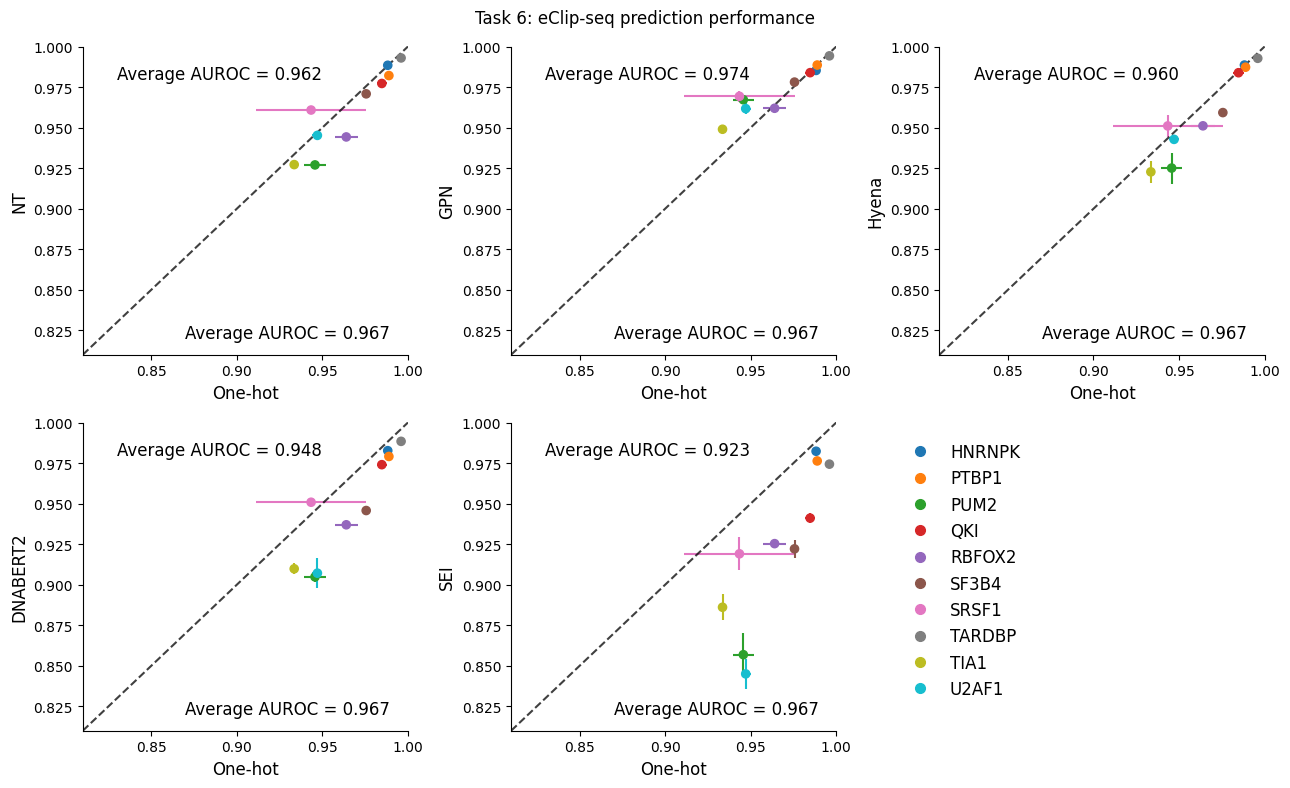

In [5]:
fig,axs = plt.subplots(2,3,figsize = (13,8),sharex=False,sharey=False)
plt.setp(axs, xlim=(0.81,1), ylim=(0.81,1))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
fig.delaxes(axs[-1,-1])
i = 0
for m in ['NT','GPN','Hyena','DNABERT2','SEI']:
    ax = axs[i//3,i%3]
    ax.errorbar(x=plot_df.loc['One-hot']['AUROC_x'],
                y=plot_df.loc[m]['AUROC_x'],
                xerr=plot_df.loc['One-hot']['AUROC_y'],
                yerr=plot_df.loc[m]['AUROC_y'],
                marker = '', ls = '',
                zorder =0, ecolor = plot_df.loc[m]['TF'].map(pal_dic))
    ax.scatter(x=plot_df.loc['One-hot']['AUROC_x'],y=plot_df.loc[m]['AUROC_x'],c=plot_df.loc[m]['TF'].map(pal_dic),s=35)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

    average = plot_df.loc[m]['AUROC_x'].mean()
    base_average = plot_df.loc['One-hot']['AUROC_x'].mean()
    ax.text(lims[0]+0.02,lims[1]-0.02,"Average AUROC = %.3f" % (average),fontsize=fontsize)
    ax.text(lims[0]+0.06,lims[0]+0.01,"Average AUROC = %.3f" % (base_average),fontsize=fontsize)
    # ax.text(lims[1]-0.5,lims[0],"Average Pearson's r = 0.247" )
    ax.set_ylabel(m,fontsize = fontsize)
    ax.set_xlabel('One-hot',fontsize = fontsize)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    i +=1 
## Shared legend
legend_elements =[Line2D([0],[0],linestyle='', marker='o', 
                        label=exp[i],
                        markerfacecolor=pal[i],
                        markeredgecolor = pal[i], 
                        markersize=7) for i in  range(len(exp))]
plt.suptitle('Task 6: eClip-seq prediction performance',fontsize=fontsize)
fig.legend(handles = legend_elements, fontsize=fontsize, frameon=False, loc='lower right',bbox_to_anchor=(0.8,0.1))
plt.tight_layout()
plt.savefig('./clip.svg')

## Alternative Splicing

In [2]:
df1 = pd.DataFrame()
for file in glob.glob('../alternative-splicing/result/*.csv'):
    df = pd.read_csv(file,index_col = 0)
    mean_df = pd.DataFrame(df.iloc[:,1:].mean())
    mean_df['Model'] = os.path.basename(file)[:-9]
    df1 = pd.concat((df1,mean_df),ignore_index=True)
df1['Downsample factor'] = '1.0'
df1 = df1.replace({'NT32_CNN': 'NT','sei': 'SEI','rbp': 'RBP','DNABERT': 'DNABERT2','CNN': 'One-hot'})

In [3]:
## P value calculation
for model_name in df1['Model'].unique():
    print(model_name) 
    p_value = stats.mannwhitneyu(df1[df1['Model'] == 'One-hot'][0],df1[df1['Model'] == model_name][0])
    print(p_value) 

DNABERT2
MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
Hyena
MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
SEI
MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
One-hot
MannwhitneyuResult(statistic=12.5, pvalue=1.0)
GPN
MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
NT10_CNN
MannwhitneyuResult(statistic=24.0, pvalue=0.015873015873015872)
NT
MannwhitneyuResult(statistic=25.0, pvalue=0.007936507936507936)
RBP
MannwhitneyuResult(statistic=24.0, pvalue=0.015873015873015872)


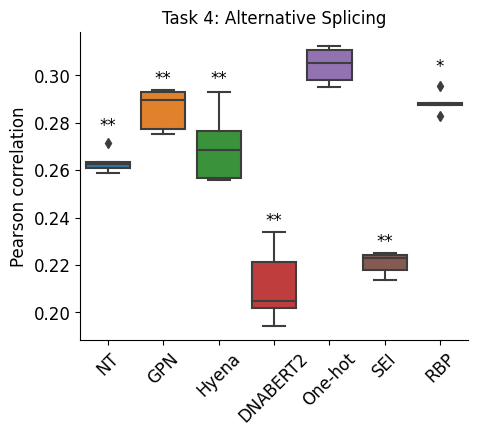

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
sns.boxplot(df1,x='Model',y=0,ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
plt.ylabel("Pearson correlation",fontsize=fontsize)
plt.xlabel("",fontsize=fontsize)
plt.title('Task 4: Alternative Splicing',fontsize=fontsize)
plt.yticks(fontsize=fontsize);
plt.xticks(fontsize=fontsize,rotation=45);
plt.text(0, 0.275, "**", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(1, 0.295, "**", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(2, 0.295, "**", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(3, 0.235, "**", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(5, 0.226, "**", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(6, 0.3, "*", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.savefig('./AS.svg')

## RNA elongation

In [8]:
import pickle as pkl
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df1 = pd.DataFrame()
for file in glob.glob('../RNAenlong/result/*.pkl'):
    with open(file, "rb") as input_file:
        df = pkl.load(input_file)
        df = df[df['Data Ratio'] == 1.0]
        df1 = pd.concat((df1,df),ignore_index=True)

df1 = df1.replace({'hyena_embed': 'Hyena'})
df1 = df1.replace({'sei_embed': 'SEI'})
df1 = df1.replace({'rbp_embed': 'RBP'})
df1 = df1.replace({'gpn_human_embed': 'GPN'})
df1 = df1.replace({'2B5_1000G_embed': 'NT'})
df1 = df1.replace({'insert_dataset':'One-hot'})
df1 = df1.replace({'dnabert_embed': 'DNABERT2'})


In [10]:
## P value calculation
for model_name in df1['Input Data'].unique():
    print(model_name) 
    p_value = stats.mannwhitneyu(df1[df1['Input Data'] == 'RBP']['Prediction Pearson R'],
                                df1[df1['Input Data'] == model_name]['Prediction Pearson R'],alternative='greater')
    print(p_value) 

Hyena
MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)
SEI
MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)
2B5_1000G_embed_l10
MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)
NT
MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)
GPN
MannwhitneyuResult(statistic=2335.0, pvalue=3.820831791954254e-14)
One-hot
MannwhitneyuResult(statistic=2406.0, pvalue=8.20732453010494e-16)
DNABERT2
MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)
RBP
MannwhitneyuResult(statistic=1250.0, pvalue=0.5013753217214452)


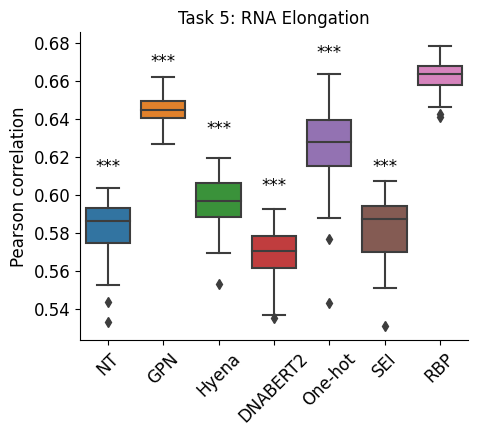

In [11]:
fig, ax = plt.subplots(figsize=(5,4))
sns.boxplot(df1,x='Input Data',y= 'Prediction Pearson R', ax = ax,order = ['NT','GPN','Hyena','DNABERT2','One-hot','SEI','RBP'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylabel("Pearson correlation",fontsize=fontsize)
plt.xlabel("",fontsize=fontsize)
plt.title('Task 5: RNA Elongation',fontsize=fontsize)
ax.grid(False)
plt.yticks(fontsize=fontsize);
plt.xticks(fontsize=fontsize,rotation=45);
plt.text(0, 0.61, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(1, 0.665, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(2, 0.63, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(3, 0.60, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(4, 0.67, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.text(5, 0.61, "***", ha='center', va='bottom', color='k', fontsize=fontsize)
plt.savefig('./insert.svg')